---

# Ioannou_Georgios


## Copyright © 2023 by Georgios Ioannou


---

<h1 align="center"> Visual Question Answering With Hugging Face </h1>

<h2 align="center"> Using/Inferencing Models Back To Back </h2>


---

# LIBRARIES


In [1]:
from bertopic import BERTopic
from PIL import Image
from transformers import (
    pipeline,
    BlenderbotTokenizer,
    BlenderbotForConditionalGeneration,
)

c:\Users\georg\ctp\.ctp-venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---

# LOAD 5 MODELS

- Two ways to us use a pretrained-model:

  1. pipeline()
  2. from_pretrained()

- The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks.
- The pipeline function also supports batch processing, which can be beneficial for performance.
- The from_pretrained method provides a more granular control over the model. It is used to load a pre-trained model given its name.


---

#### OVERALL PROCESS: User Input (Image + Question) -> Model 1 -> Model 2 -> Model 3 -> Model 4 -> Model 5


In [2]:
# Model 1.
# Model 1 gets input from the user.
# User -> Model 1

vqa_pipeline = pipeline(
    task="visual-question-answering", model="dandelin/vilt-b32-finetuned-vqa"
)
#########################################################################

# Model 2.
# Model 2 gets input from Model 1.
# User -> Model 1 -> Model 2

bbu_pipeline = pipeline(task="fill-mask", model="bert-base-uncased")
#########################################################################

# Model 3.
# Model 3 gets input from Model 2.
# User -> Model 1 -> Model 2 -> Model 3

model_name = "facebook/blenderbot-400M-distill"
tokenizer = BlenderbotTokenizer.from_pretrained(
    pretrained_model_name_or_path=model_name
)
facebook_model = BlenderbotForConditionalGeneration.from_pretrained(
    pretrained_model_name_or_path=model_name
)
#########################################################################

# Model 4.
# Model 4 gets input from Model 3.
# User -> Model 1 -> Model 2 -> Model 3 -> Model 4

gpt2_pipeline = pipeline(task="text-generation", model="gpt2")
#########################################################################

# Model 5.
# Model 5 gets input from Model 4.
# User -> Model 1 -> Model 2 -> Model 3 -> Model 4 -> Model 5

topic_model_1 = BERTopic.load(path="davanstrien/chat_topics")
topic_model_2 = BERTopic.load(path="MaartenGr/BERTopic_ArXiv")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


---

# IMAGE


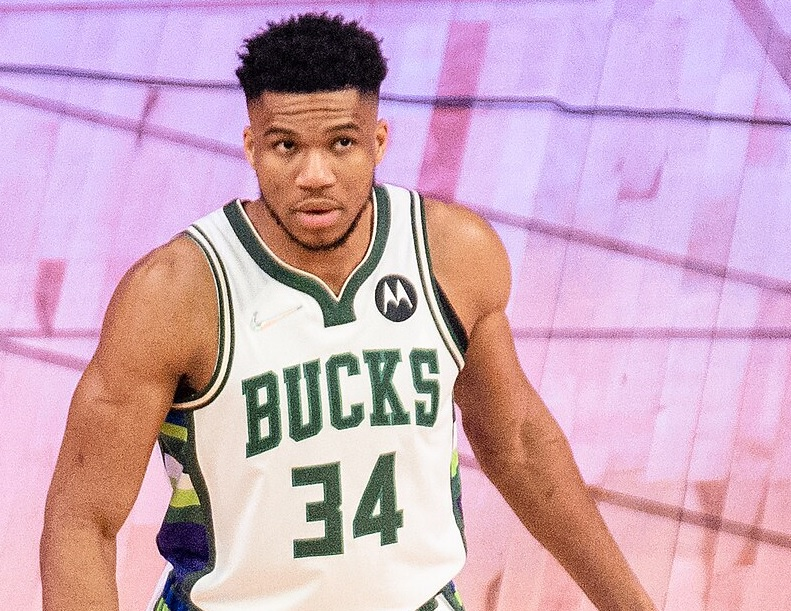

In [3]:
image = Image.open("giannis_2.jpg")
image

---

# QUESTION


In [4]:
question = "Guess the sport."

---

# FIRST MODEL

# TASK: visual-question-answering


In [5]:
vqa_pipeline(image, question, top_k=1)

[{'score': 0.9666104316711426, 'answer': 'basketball'}]

In [6]:
vqa_pipeline(image, question, top_k=5)

[{'score': 0.9666104316711426, 'answer': 'basketball'},
 {'score': 0.04602206498384476, 'answer': 'yes'},
 {'score': 0.04534522071480751, 'answer': 'tennis'},
 {'score': 0.02896641567349434, 'answer': 'practice'},
 {'score': 0.021664002910256386, 'answer': 'baseball'}]

In [7]:
vqa_pipeline_output_1 = vqa_pipeline(image, question, top_k=5)[0]
vqa_pipeline_output_1

{'score': 0.9666103720664978, 'answer': 'basketball'}

In [8]:
vqa_pipeline_output_2 = vqa_pipeline(image, question, top_k=5)[1]
vqa_pipeline_output_2

{'score': 0.04602203145623207, 'answer': 'yes'}

---

# SECOND MODEL

# TASK : fill-mask


In [9]:
vqa_pipeline_output_1

{'score': 0.9666103720664978, 'answer': 'basketball'}

In [10]:
text = (
    "I love "
    + str(vqa_pipeline_output_1["answer"])
    + " and I would like to know how to [MASK]."
)

print(text)

bbu_pipeline_output_1 = bbu_pipeline(text)
bbu_pipeline_output_1

I love basketball and I would like to know how to [MASK].


[{'score': 0.764213502407074,
  'token': 2377,
  'token_str': 'play',
  'sequence': 'i love basketball and i would like to know how to play.'},
 {'score': 0.027056796476244926,
  'token': 5607,
  'token_str': 'shoot',
  'sequence': 'i love basketball and i would like to know how to shoot.'},
 {'score': 0.021794013679027557,
  'token': 2663,
  'token_str': 'win',
  'sequence': 'i love basketball and i would like to know how to win.'},
 {'score': 0.015820862725377083,
  'token': 5466,
  'token_str': 'throw',
  'sequence': 'i love basketball and i would like to know how to throw.'},
 {'score': 0.010276880115270615,
  'token': 5566,
  'token_str': 'compete',
  'sequence': 'i love basketball and i would like to know how to compete.'}]

In [11]:
vqa_pipeline_output_2

{'score': 0.04602203145623207, 'answer': 'yes'}

In [12]:
text = (
    "I love "
    + str(vqa_pipeline_output_2["answer"])
    + " and I would like to know how to [MASK]."
)

print(text)

bbu_pipeline_output_2 = bbu_pipeline(text)
bbu_pipeline_output_2

I love yes and I would like to know how to [MASK].


[{'score': 0.10304602980613708,
  'token': 2377,
  'token_str': 'play',
  'sequence': 'i love yes and i would like to know how to play.'},
 {'score': 0.03973079472780228,
  'token': 2293,
  'token_str': 'love',
  'sequence': 'i love yes and i would like to know how to love.'},
 {'score': 0.037538792937994,
  'token': 2444,
  'token_str': 'live',
  'sequence': 'i love yes and i would like to know how to live.'},
 {'score': 0.036974117159843445,
  'token': 2514,
  'token_str': 'feel',
  'sequence': 'i love yes and i would like to know how to feel.'},
 {'score': 0.03364714980125427,
  'token': 2079,
  'token_str': 'do',
  'sequence': 'i love yes and i would like to know how to do.'}]

---

# THIRD MODEL

# Task: conversation

### CHATBOT IN 8 LINES OF CODE


In [13]:
bbu_pipeline_output_1

[{'score': 0.764213502407074,
  'token': 2377,
  'token_str': 'play',
  'sequence': 'i love basketball and i would like to know how to play.'},
 {'score': 0.027056796476244926,
  'token': 5607,
  'token_str': 'shoot',
  'sequence': 'i love basketball and i would like to know how to shoot.'},
 {'score': 0.021794013679027557,
  'token': 2663,
  'token_str': 'win',
  'sequence': 'i love basketball and i would like to know how to win.'},
 {'score': 0.015820862725377083,
  'token': 5466,
  'token_str': 'throw',
  'sequence': 'i love basketball and i would like to know how to throw.'},
 {'score': 0.010276880115270615,
  'token': 5566,
  'token_str': 'compete',
  'sequence': 'i love basketball and i would like to know how to compete.'}]

In [14]:
# from transformers import BlenderbotTokenizer, BlenderbotForConditionalGeneration

# model_name = "facebook/blenderbot-400M-distill"
# tokenizer = BlenderbotTokenizer.from_pretrained(model_name)
# model = BlenderbotForConditionalGeneration.from_pretrained(model_name)

# Making an utterance.

utterance = bbu_pipeline_output_1[0]["sequence"]
print("utterance =", utterance)

# Tokenize the utterance.

inputs = tokenizer(utterance, return_tensors="pt")

# Generate model results.

result = facebook_model.generate(**inputs)

# Print response.

facebook_model_output_1 = tokenizer.decode(result[0])
facebook_model_output_1

utterance = i love basketball and i would like to know how to play.


'<s> Basketball is one of my favorite sports to watch. It is played on a rectangular court.</s>'

In [15]:
bbu_pipeline_output_2

[{'score': 0.10304602980613708,
  'token': 2377,
  'token_str': 'play',
  'sequence': 'i love yes and i would like to know how to play.'},
 {'score': 0.03973079472780228,
  'token': 2293,
  'token_str': 'love',
  'sequence': 'i love yes and i would like to know how to love.'},
 {'score': 0.037538792937994,
  'token': 2444,
  'token_str': 'live',
  'sequence': 'i love yes and i would like to know how to live.'},
 {'score': 0.036974117159843445,
  'token': 2514,
  'token_str': 'feel',
  'sequence': 'i love yes and i would like to know how to feel.'},
 {'score': 0.03364714980125427,
  'token': 2079,
  'token_str': 'do',
  'sequence': 'i love yes and i would like to know how to do.'}]

In [16]:
# from transformers import BlenderbotTokenizer, BlenderbotForConditionalGeneration

model_name = "facebook/blenderbot-400M-distill"
tokenizer = BlenderbotTokenizer.from_pretrained(model_name)
model = BlenderbotForConditionalGeneration.from_pretrained(model_name)

# Making an utterance.

utterance = bbu_pipeline_output_2[0]["sequence"]
print("utterance =", utterance)

# Tokenize the utterance.

inputs = tokenizer(utterance, return_tensors="pt")

# Generate model results.

result = facebook_model.generate(**inputs)

# Print response.

facebook_model_output_2 = tokenizer.decode(result[0])
facebook_model_output_2

utterance = i love yes and i would like to know how to play.


"<s><s> Me too! I would love to learn to play the piano, but I don't know where to start.</s>"

In [17]:
# CHATBOT LOOP.
#
# while True:
#     # Making an utterance.

#     utterance = input("Type your message")

#     if input == str(1):
#         break

#     # Tokenize the utterance.

#     inputs = tokenizer(utterance, return_tensors="pt")

#     # Generate model results.

#     result = model.generate(**inputs)

#     # Print response.

#     print(tokenizer.decode(result[0]))

---

# FOURTH MODEL

# TASK : text-generation


In [18]:
facebook_model_output_1 = facebook_model_output_1.replace("<s> ", "")
facebook_model_output_1 = facebook_model_output_1.replace("</s>", "")
facebook_model_output_1

'Basketball is one of my favorite sports to watch. It is played on a rectangular court.'

In [19]:
gpt2_pipeline_output_1 = gpt2_pipeline(facebook_model_output_1)[0]["generated_text"]
gpt2_pipeline_output_1

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Basketball is one of my favorite sports to watch. It is played on a rectangular court. You can see basketball play during a game and watch it from the sidelines. It is a wonderful place to watch something as big as basketball from every viewpoint.'

In [20]:
facebook_model_output_2 = facebook_model_output_2.replace("<s> ", "")
facebook_model_output_2 = facebook_model_output_2.replace("<s>", "")
facebook_model_output_2 = facebook_model_output_2.replace("</s>", "")
facebook_model_output_2

"Me too! I would love to learn to play the piano, but I don't know where to start."

In [21]:
gpt2_pipeline_output_2 = gpt2_pipeline(facebook_model_output_2)[0]["generated_text"]
gpt2_pipeline_output_2

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"Me too! I would love to learn to play the piano, but I don't know where to start.\n\nI just graduated from Cornell University and my first real job was playing saxophone in New Jersey. The piano was my last guitar and"

---

# FIFTH MODEL

# TASK: classify-topic


In [22]:
gpt2_pipeline_output_1

'Basketball is one of my favorite sports to watch. It is played on a rectangular court. You can see basketball play during a game and watch it from the sidelines. It is a wonderful place to watch something as big as basketball from every viewpoint.'

In [23]:
topic, prob = topic_model_1.transform(gpt2_pipeline_output_1)
topic_model_1_output_1 = topic_model_1.get_topic_info(topic[0])["Representation"][0]
topic_model_1_output_1

Batches: 100%|██████████| 1/1 [00:00<00:00, 27.61it/s]


['pele',
 'maradona',
 'lebron',
 'ronaldo',
 'nba',
 'zidane',
 'basketball',
 'giannis',
 'player',
 'messi']

In [24]:
topic, prob = topic_model_2.transform(gpt2_pipeline_output_1)
topic_model_2_output_1 = topic_model_2.get_topic_info(topic[0])["Representation"][0]
topic_model_2_output_1

Batches: 100%|██████████| 1/1 [00:00<00:00, 32.24it/s]


['geographic',
 'location',
 'geolocation',
 'geo',
 'locations',
 'spatial',
 'city',
 'place',
 'movement',
 'places']

In [25]:
gpt2_pipeline_output_2

"Me too! I would love to learn to play the piano, but I don't know where to start.\n\nI just graduated from Cornell University and my first real job was playing saxophone in New Jersey. The piano was my last guitar and"

In [26]:
topic, prob = topic_model_1.transform(gpt2_pipeline_output_2)
topic_model_1_output_2 = topic_model_1.get_topic_info(topic[0])["Representation"][0]
topic_model_1_output_2

Batches: 100%|██████████| 1/1 [00:00<00:00, 30.67it/s]


['guitars',
 'guitar',
 'strings',
 'guitarists',
 'instrument',
 'instruments',
 'materials',
 'acoustic',
 'maintenance',
 'lifespan']

In [27]:
topic, prob = topic_model_2.transform(gpt2_pipeline_output_2)
topic_model_2_output_2 = topic_model_2.get_topic_info(topic[0])["Representation"][0]
topic_model_2_output_2

Batches: 100%|██████████| 1/1 [00:00<00:00, 23.86it/s]


['agents',
 'emergent',
 'communication',
 'referential',
 'games',
 'compositionality',
 'emergence',
 'agent',
 'language',
 'symbol']

---

<h1 align="center"> Combining All 5 Models </h1>


In [28]:
image_path = ""
current_image_path = ""
question = ""
first_turn = True

try:
    while image_path != str(1) and question != str(1):
        ###############################################################################

        if first_turn:
            image_path = input("Please enter the image path (type 1 to EXIT)\n")
        else:
            image_path = input(
                "Please enter the image path (type 1 to EXIT) (type 2 to reuse image)\n"
            )

        ###############################################################################

        if image_path == str(1):
            break
        elif image_path == str(2) and first_turn == False:
            pass
        else:
            image = Image.open(str(image_path))

        question = input("Please enter your question (type 1 to EXIT)\n")

        ###############################################################################

        # 5 MODEL INFERENCES.
        # User Input = Image + Question About The Image.
        # User -> Model 1 -> Model 2 -> Model 3 -> Model 4 -> Model 5

        # Model 1.

        vqa_pipeline_output = vqa_pipeline(image, question, top_k=5)[0]

        # Model 2.

        text = (
            "I love "
            + str(vqa_pipeline_output["answer"])
            + " and I would like to know how to [MASK]."
        )
        bbu_pipeline_output = bbu_pipeline(text)

        # Model 3.

        utterance = bbu_pipeline_output[0]["sequence"]
        inputs = tokenizer(utterance, return_tensors="pt")
        result = facebook_model.generate(**inputs)
        facebook_model_output = tokenizer.decode(result[0])

        # Model 4.

        facebook_model_output = facebook_model_output.replace("<s> ", "")
        facebook_model_output = facebook_model_output.replace("<s>", "")
        facebook_model_output = facebook_model_output.replace("</s>", "")
        gpt2_pipeline_output = gpt2_pipeline(facebook_model_output)[0]["generated_text"]

        # Model 5.

        topic, prob = topic_model_1.transform(gpt2_pipeline_output)
        topic_model_1_output = topic_model_1.get_topic_info(topic[0])["Representation"][
            0
        ]

        topic, prob = topic_model_2.transform(gpt2_pipeline_output)
        topic_model_2_output = topic_model_2.get_topic_info(topic[0])["Representation"][
            0
        ]
        ###############################################################################

        print()

        print("-" * 150)
        print("vqa_pipeline_output = ", vqa_pipeline_output)
        print("bbu_pipeline_output =", bbu_pipeline_output)
        print("facebook_model_output =", facebook_model_output)
        print("gpt2_pipeline_output =", gpt2_pipeline_output)
        print("topic_model_1_output =", topic_model_1_output)
        print("topic_model_2_output =", topic_model_2_output)

        print()

        print("-" * 150)
        print("SUMMARY")
        print("-" * 7)
        print("Your Image:", image)
        print("Your Question:", question)
        print("-" * 100)
        print(
            "1. Highest Predicted Answer For Your Question:",
            vqa_pipeline_output["answer"],
            "\n",
        )
        print(text)
        print(
            "2. Highest Predicted Sequence On [MASK] Based on 1.:",
            bbu_pipeline_output[0]["sequence"],
            "\n",
        )
        print(
            "3. Conversation Based On Previous Answer Based on 2.:",
            facebook_model_output,
            "\n",
        )
        print(
            "4. Text Generated Based On Previous Answer Based on 3.:",
            gpt2_pipeline_output,
            "\n",
        )
        print(
            "5. Highest Predicted Topic Model_1 For Previous The Answer Based on 4.:",
            topic_model_1_output,
            "\n",
        )
        print(
            "6. Highest Predicted Topic Model_2 For Previous The Answer Based on 4.:",
            topic_model_2_output,
        )
        print("-" * 150)

        first_turn = False
except Exception as e:
    print("Error:", e)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Batches: 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]



------------------------------------------------------------------------------------------------------------------------------------------------------
vqa_pipeline_output =  {'score': 0.9907084703445435, 'answer': 'basketball'}
bbu_pipeline_output = [{'score': 0.764213502407074, 'token': 2377, 'token_str': 'play', 'sequence': 'i love basketball and i would like to know how to play.'}, {'score': 0.027056796476244926, 'token': 5607, 'token_str': 'shoot', 'sequence': 'i love basketball and i would like to know how to shoot.'}, {'score': 0.021794013679027557, 'token': 2663, 'token_str': 'win', 'sequence': 'i love basketball and i would like to know how to win.'}, {'score': 0.015820862725377083, 'token': 5466, 'token_str': 'throw', 'sequence': 'i love basketball and i would like to know how to throw.'}, {'score': 0.010276880115270615, 'token': 5566, 'token_str': 'compete', 'sequence': 'i love basketball and i would like to know how to compete.'}]
facebook_model_output = Basketball is one o